In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.colors import ListedColormap
import pandas as pd


# Import danych

In [2]:
train_file_path = "../data/data3.txt"
max_iter_count = 1000
classes = [1,2]

train_data = np.genfromtxt(train_file_path,  delimiter="  ", skip_header=1, dtype=np.float128)
# Replace classes with 1 and -1
train_data[:,0][train_data[:,0]==classes[0]]=1
train_data[:,0][train_data[:,0]==classes[1]]=-1
#swap columns first and last columns
train_data[:, 0], train_data[:, -1] = train_data[:, -1], train_data[:, 0].copy()
train_data

array([[ 4.,  2.,  1.],
       [ 2.,  4.,  1.],
       [ 4.,  4.,  1.],
       [-3., -1., -1.],
       [-1., -3., -1.]], dtype=float128)

# Dane 


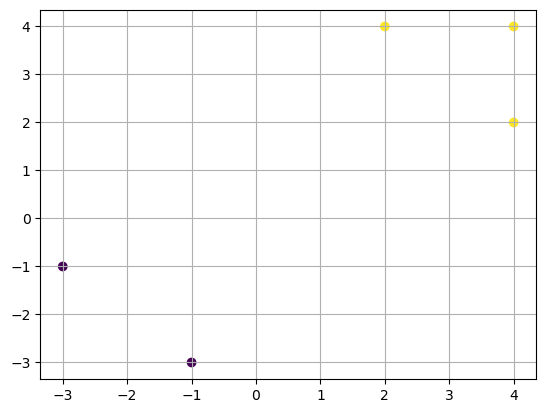

In [3]:
plt.scatter(train_data[:,0],train_data[:,1],c=train_data[:,2])
plt.grid()

# Algorytm

In [4]:
def discrimiantion_fucntion(data,current_v):
    return np.inner(data,current_v[:-1])+current_v[-1]

def classify(data, current_v):
    discrimiation_fucntion_value = discrimiantion_fucntion(data,current_v)
    if discrimiation_fucntion_value>0:
        return 1
    return -1

def error_count(data,current_v):
    expected_value = data[:,-1] # 1 -1
    actual_values = np.array([classify(data_row[:-1],current_v) for data_row in data])
    return np.sum(expected_value!=actual_values)

In [14]:
v = np.zeros(train_data.shape[1])
best_v = np.zeros(train_data.shape[1])
best_error_count = np.Inf # lower better
no_train_count = 0
for index, train_row in enumerate(cycle(train_data)):
    if no_train_count>4 or index>max_iter_count:
        break
    print(train_row)
    product = np.inner(train_row,v)
    if product<=0:
        v+=train_row
        no_train_count=0
    else:
        no_train_count +=1
    
    current_error_count = error_count(train_data, v)
    if current_error_count<=best_error_count:
        best_error_count = current_error_count
        best_v = v.copy()
    print(f"Iteration {index:<4} | product = {np.round(product,2):<5} | current_error_count={current_error_count/train_data.shape[0]}")



[4. 2. 1.]
Iteration 0    | product = 0.0   | current_error_count=0.0
[2. 4. 1.]
Iteration 1    | product = 17.0  | current_error_count=0.0
[4. 4. 1.]
Iteration 2    | product = 25.0  | current_error_count=0.0
[-3. -1. -1.]
Iteration 3    | product = -15.0 | current_error_count=0.0
[-1. -3. -1.]
Iteration 4    | product = -4.0  | current_error_count=1.0
[4. 2. 1.]
Iteration 5    | product = -5.0  | current_error_count=0.0
[2. 4. 1.]
Iteration 6    | product = 8.0   | current_error_count=0.0
[4. 4. 1.]
Iteration 7    | product = 16.0  | current_error_count=0.0
[-3. -1. -1.]
Iteration 8    | product = -12.0 | current_error_count=0.6
[-1. -3. -1.]
Iteration 9    | product = 3.0   | current_error_count=0.6
[4. 2. 1.]
Iteration 10   | product = 1.0   | current_error_count=0.6
[2. 4. 1.]
Iteration 11   | product = -3.0  | current_error_count=0.0
[4. 4. 1.]
Iteration 12   | product = 24.0  | current_error_count=0.0
[-3. -1. -1.]
Iteration 13   | product = -12.0 | current_error_count=0.0
[-1. 

In [6]:
@np.vectorize
def discrimination_func(x,y):
    return (best_v[0]*x+best_v[1]*y+best_v[2])>0
x = np.linspace(np.min(train_data)*1.3, np.max(train_data)*1.3, 1000)
X,Y = np.meshgrid(x,x)
X = X.T
Y = Y.T
Z = discrimination_func(X, Y)
Z

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

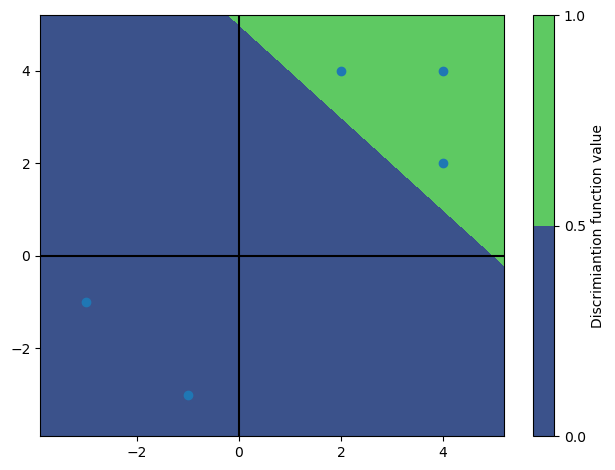

In [7]:
h= plt.contourf(X, Y, Z)
markers = np.array(train_data[:,2]+2, dtype=np.int64).astype(str)
plt.scatter(train_data[:,0],train_data[:,1])
plt.colorbar(h, label="Discrimiantion function value")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.tight_layout()

In [8]:
best_v

array([  2.,   2., -10.])

In [9]:
t = np.linspace(np.min(train_data), np.max(train_data), 1024)
t

array([-3.        , -2.99315738, -2.98631476, ...,  3.98631476,
        3.99315738,  4.        ], dtype=float128)

In [10]:
np.maximum()

TypeError: maximum() takes from 2 to 3 positional arguments but 0 were given

In [ ]:
for data in train_data:
    result = classify([3,3], v)
    print(result)

In [ ]:
np.dot(train_data[0],v)

In [ ]:
train_data.shape